In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data_folder='Desktop/CREM/Raw Data/OFS'
os.listdir(raw_data_folder)

['.DS_Store',
 'energy_consumption_by_consumers.xls',
 'final_energy_consumption.xls',
 'electricity_production.xls',
 'new_renewables_energy_production.xls',
 'renewables_energy_consumption.xls',
 'compte_énergie_ménages_economie.xls',
 'utilization_rate_nuclear_centrals.xls',
 'Démographie par canton.xlsx',
 'Données démographie suisse.xlsx',
 'energy_importation.xls']

In [3]:
first_row=['Centrales hydrauliques (TWh)','Centrales nucléaires (TWh)','Centrales thermiques (TWh)','Renouvelables (TWh)','Production brute (TWh)', 'Pompage accumulation (TWh)','Production nette (TWh)']
e_p=pd.read_excel(os.path.join(raw_data_folder,'electricity_production.xls'),skiprows=9,names=first_row,index_col=0)
e_p.reset_index(inplace=True)
e_p.rename(columns={'index':'Année'},inplace=True)
e_p.head()

,Année,Centrales hydrauliques (TWh),Centrales nucléaires (TWh),Centrales thermiques (TWh),Renouvelables (TWh),Production brute (TWh),Pompage accumulation (TWh),Production nette (TWh)
0,1970,31273,1850,1763,0,34886,965,33921
1,1971,27563,1843,2181,0,31587,1377,30210
2,1972,25277,4650,2371,0,32298,1644,30654
3,1973,28825,5896,2434,0,37155,1724,35431
4,1974,28563,6730,2117,0,37410,1541,35869


In [4]:
data_folder='Desktop/CREM/Data'
e_p.to_csv(os.path.join(data_folder,"energy_production_v1"))

<IPython.core.display.Javascript object>


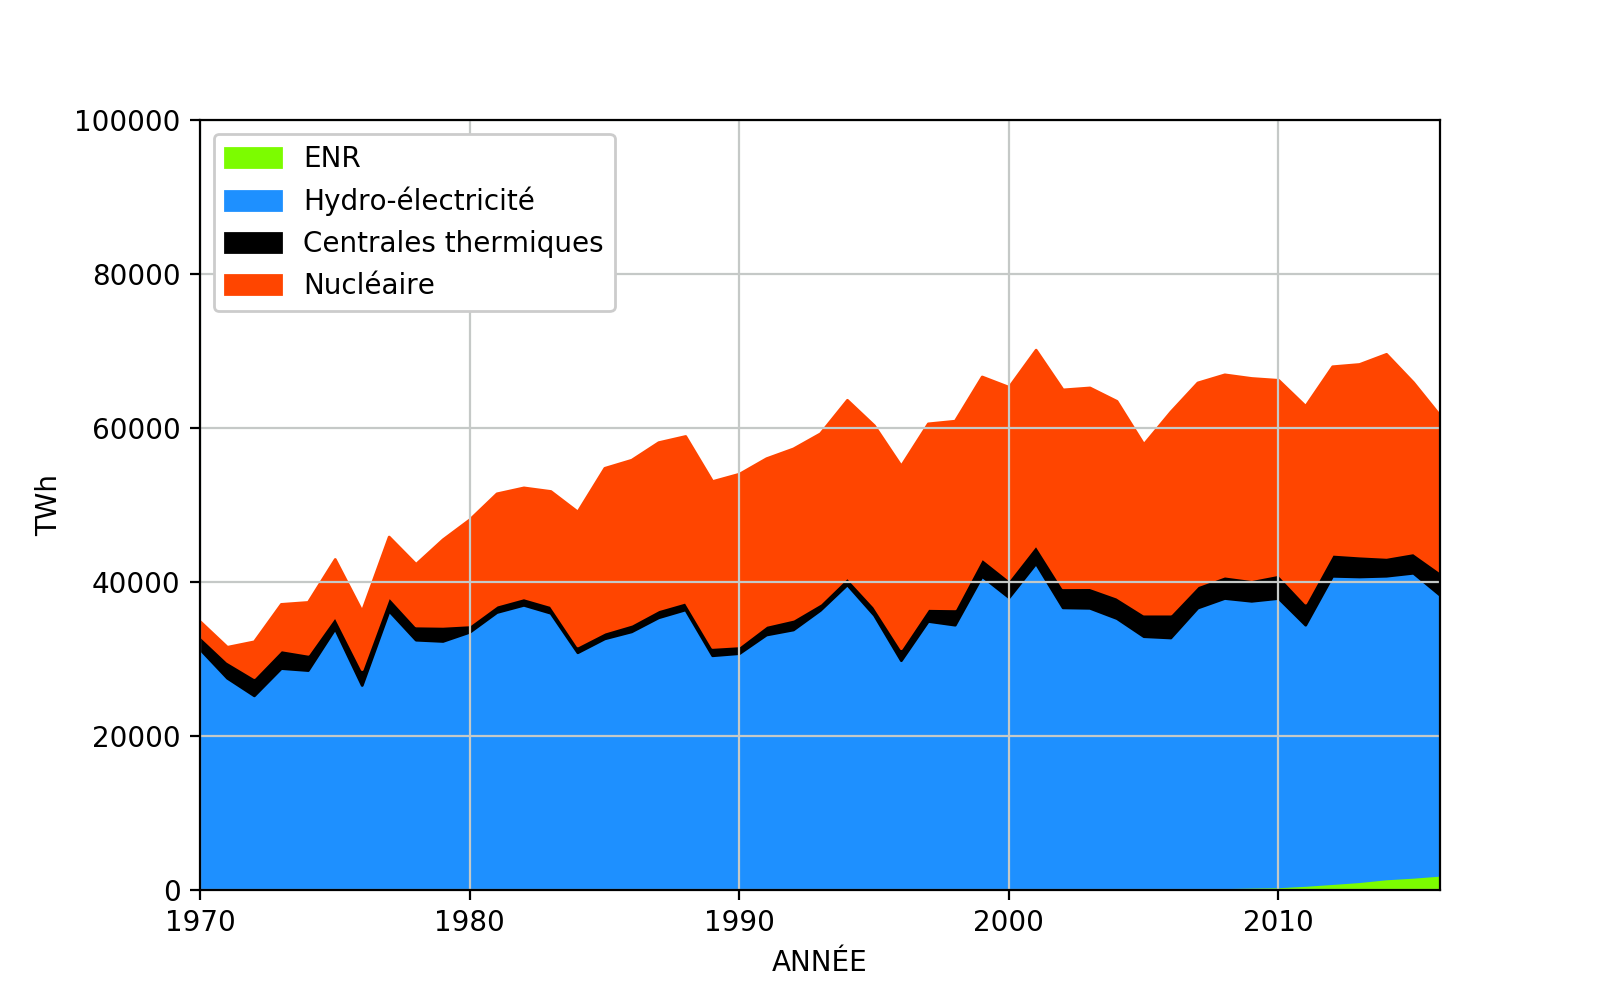

[1970, 2016, 0, 100000]

In [5]:
%matplotlib notebook

plt.figure("Production d'électricité",figsize=(8,5))
X=e_p['Année']

plt.fill_between(X,e_p['Renouvelables (TWh)'],label='ENR',color='lawngreen')
plt.fill_between(X,e_p['Renouvelables (TWh)'],e_p['Renouvelables (TWh)']+e_p['Centrales hydrauliques (TWh)'],label='Hydro-électricité',color='dodgerblue')
plt.fill_between(X,e_p['Renouvelables (TWh)']+e_p['Centrales hydrauliques (TWh)'],e_p['Renouvelables (TWh)']+e_p['Centrales hydrauliques (TWh)']+e_p['Centrales thermiques (TWh)'],label='Centrales thermiques',color='black')
plt.fill_between(X,e_p['Renouvelables (TWh)']+e_p['Centrales hydrauliques (TWh)']+e_p['Centrales thermiques (TWh)'],e_p['Renouvelables (TWh)']+e_p['Centrales hydrauliques (TWh)']+e_p['Centrales thermiques (TWh)']+e_p['Centrales nucléaires (TWh)'],label='Nucléaire',color='orangered')

plt.grid(color='xkcd:silver')
plt.xlabel('ANNÉE')
plt.ylabel('TWh')
plt.legend(loc=2,framealpha=1)
plt.axis([1970,2016,0,100000])